# Study Kasus Random Walk

**Agung Malik Ibrahim | 2311110067**
<br>**Leonardus Ananto Widodo | 2311110058**
<br>**Egy Destiar Firmandani | 2311110061**</br>

Disini kami memilih 4 sub tema dengan perusahaan untuk dianalisis harga sahamnya selama 1 tahun kedepan menggunakan metode random walk.
1. Sektor Keuangan - PT BCA
2. Sektor Energi - PT Pertamina
3. Sektor Pertambangan - PT Barito
4. Sektor Properti & Real Estate - PT Agung Podomoro Land

## Import Library

In [88]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
pertamina = yf.download("PGEO.JK", start="2024-01-01", end="2024-12-27")
bca = yf.download("BBCA.JK", start="2024-01-01", end="2024-12-27")
barito = yf.download("BRPT.JK", start="2024-01-01", end="2024-12-27")
podomoro = yf.download("APLN.JK", start="2024-01-01", end="2024-12-27")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**DATASET**
> Data yang kami gunakan semuanya bersumber dari Yahoo Finance yang terjamin kualitas datanya sehingga dapat dilakukan analisis secara mendalam. Data dimulai dari tanggal 1 Januari 2024 sampai dengan notebook ini dibuat, yaitu tanggal 27 Desember 2024. Kami akan melakukan prediksi harga close price untuk masing-masing perusahaan selama 1 tahun (365 hari) kedepan

**METODE**
> Kami akan melakukan 2 metode yang berbeda, yaitu pertama menggunakan `Random Walk` dan yang kedua menggunakan `Geometric Brownian Motion`, yaitu sebuah metode stokastik yang merupakan pengembangan dari konsep Random Walk

## BCA

In [3]:
print(bca)

Price             Close          High          Low         Open     Volume
Ticker          BBCA.JK       BBCA.JK      BBCA.JK      BBCA.JK    BBCA.JK
Date                                                                      
2024-01-02  9166.983398   9166.983398  9094.036581  9142.667793   30545200
2024-01-03  9094.036133   9166.982947  9069.720528  9166.982947   34603300
2024-01-04  9215.614258   9215.614258  9118.351838  9142.667443   56501800
2024-01-05  9312.876953   9337.192559  9215.614531  9239.930136   85290100
2024-01-08  9312.876953   9361.508164  9215.614531  9337.192559   50896000
...                 ...           ...          ...          ...        ...
2024-12-18  9800.000000  10025.000000  9800.000000  9900.000000   84868500
2024-12-19  9675.000000   9775.000000  9550.000000  9700.000000  104254100
2024-12-20  9650.000000   9750.000000  9625.000000  9650.000000   91576900
2024-12-23  9775.000000   9850.000000  9700.000000  9700.000000   43292100
2024-12-24  9750.000000  

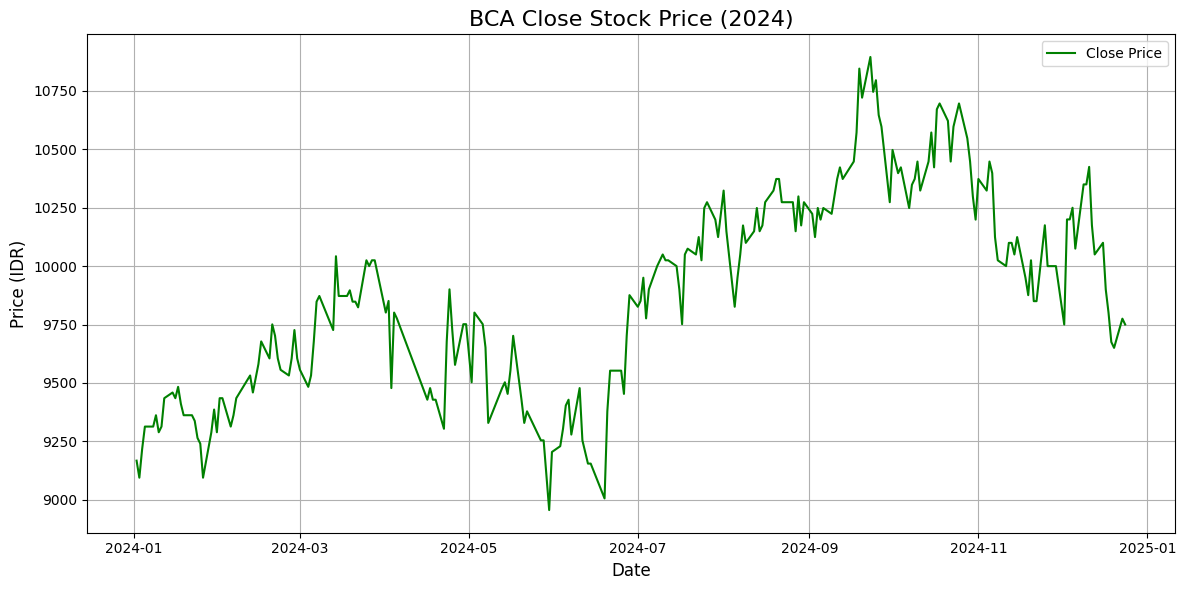

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(bca.index, bca["Close"], label="Close Price", linestyle="-", color="green")
plt.title("BCA Close Stock Price (2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
print(bca.describe())

Price          Close          High           Low          Open        Volume
Ticker       BBCA.JK       BBCA.JK       BBCA.JK       BBCA.JK       BBCA.JK
count     235.000000    235.000000    235.000000    235.000000  2.350000e+02
mean     9888.242960   9972.207708   9807.379754   9891.795400  8.064185e+07
std       434.215843    427.785557    427.128018    425.661664  5.686091e+07
min      8955.334961   9166.982947   8731.451587   8955.334961  2.465800e+07
25%      9492.845703   9626.985098   9434.454641   9505.003167  5.396170e+07
50%      9896.452148  10000.124023   9847.820137   9950.000000  6.869090e+07
75%     10236.444824  10298.634766  10149.379559  10248.882883  9.265105e+07
max     10895.657227  10895.657227  10721.525438  10845.905036  7.564316e+08


### Geometric Brownian Motion

In [93]:
display(Math(r"S_{t+1} = S_t \cdot e^{(\mu - 0.5\sigma^2)\Delta t + \sigma \epsilon \sqrt{\Delta t}}"))

<IPython.core.display.Math object>

Geometric Brownian Motion (GBM) adalah model stokastik untuk memprediksi pergerakan harga saham, yang merupakan pengembangan dari Random Walk dengan menambahkan komponen drift (\u03BC) dan volatilitas (\u03C3). GBM mengasumsikan bahwa log-return saham berdistribusi normal, sehingga dapat mencerminkan sifat alami pasar saham yang bersifat stokastik.

In [26]:
data = bca['Close']
returns = np.log(data / data.shift(1)) 

mu = returns.mean()
sigma = returns.std()

days = 365
S0 = data.iloc[-1]
np.random.seed(42) 
epsilon = np.random.normal(0, 1, days)

dt = 1  
prices = [S0]

In [27]:
for i in range(1, days + 1):
    S_t = prices[-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * epsilon[i - 1] * np.sqrt(dt))
    prices.append(S_t)

dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(prices[1:]), freq='B')
future_bca = pd.DataFrame({'Date': dates, 'Predicted Close': prices[1:]})

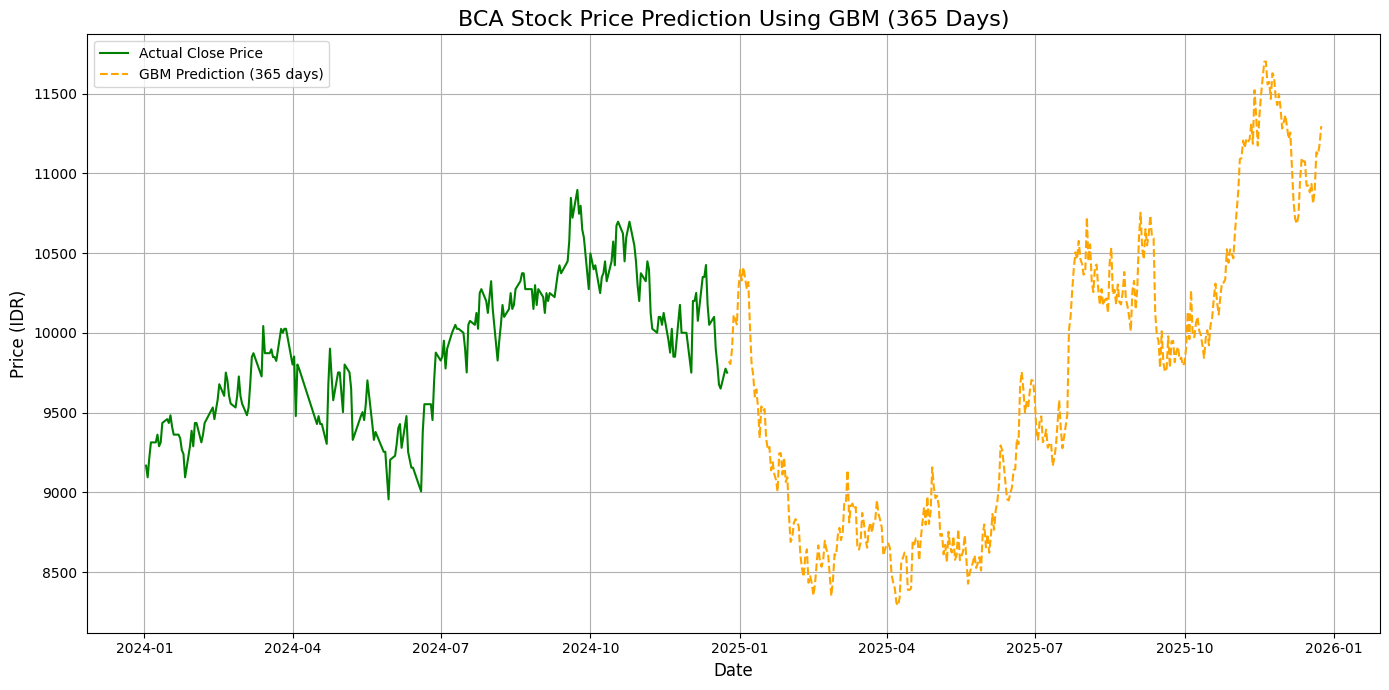

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(bca.index, bca['Close'], label="Actual Close Price", color="green")
plt.plot(future_bca['Date'], future_bca['Predicted Close'], label=f"GBM Prediction ({days} days)", linestyle="--", color="orange")
plt.title(f"BCA Stock Price Prediction Using GBM ({days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Random Walk

In [92]:
display(Math(r"S_{t+1} = S_t + \epsilon_t"))

<IPython.core.display.Math object>

Random Walk adalah model stokastik di mana perubahan harga saham diasumsikan acak, berdasarkan harga sebelumnya (S_t) ditambah komponen error acak (\u03B5_t). Model ini mengasumsikan bahwa pergerakan harga saham tidak dipengaruhi oleh pola historis, melainkan oleh informasi baru yang muncul secara acak.

In [29]:
bca['Log Return BCA'] = np.log(bca['Close'] / bca['Close'].shift(1))
log_return_mean_bca = bca['Log Return BCA'].mean()
log_return_std_bca = bca['Log Return BCA'].std()

In [30]:
np.random.seed(42)  
days = 365
random_steps = np.random.normal(loc=log_return_mean_bca, scale=log_return_std_bca, size=days)

last_price_bca = bca['Close'].iloc[-1]  
future_prices_bca = [last_price_bca * np.exp(random_steps[0])]
for step in random_steps[1:]:
    future_prices_bca.append(future_prices_bca[-1] * np.exp(step))

In [31]:
future_dates_bca = pd.date_range(start=bca.index[-1] + pd.Timedelta(days=1), periods=days)
future_bca = pd.DataFrame({'Date': future_dates_bca, 'Predicted Close': future_prices_bca})

print(future_bca)

          Date                                    Predicted Close
0   2024-12-25  Ticker
BBCA.JK    9820.807172
Name: 2024-12-24...
1   2024-12-26  Ticker
BBCA.JK    9804.347962
Name: 2024-12-24...
2   2024-12-27  Ticker
BBCA.JK    9896.501015
Name: 2024-12-24...
3   2024-12-28  Ticker
BBCA.JK    10113.023052
Name: 2024-12-2...
4   2024-12-29  Ticker
BBCA.JK    10082.49368
Name: 2024-12-24...
..         ...                                                ...
360 2025-12-20  Ticker
BBCA.JK    10892.089915
Name: 2024-12-2...
361 2025-12-21  Ticker
BBCA.JK    11131.911142
Name: 2024-12-2...
362 2025-12-22  Ticker
BBCA.JK    11117.858191
Name: 2024-12-2...
363 2025-12-23  Ticker
BBCA.JK    11183.674865
Name: 2024-12-2...
364 2025-12-24  Ticker
BBCA.JK    11295.522169
Name: 2024-12-2...

[365 rows x 2 columns]


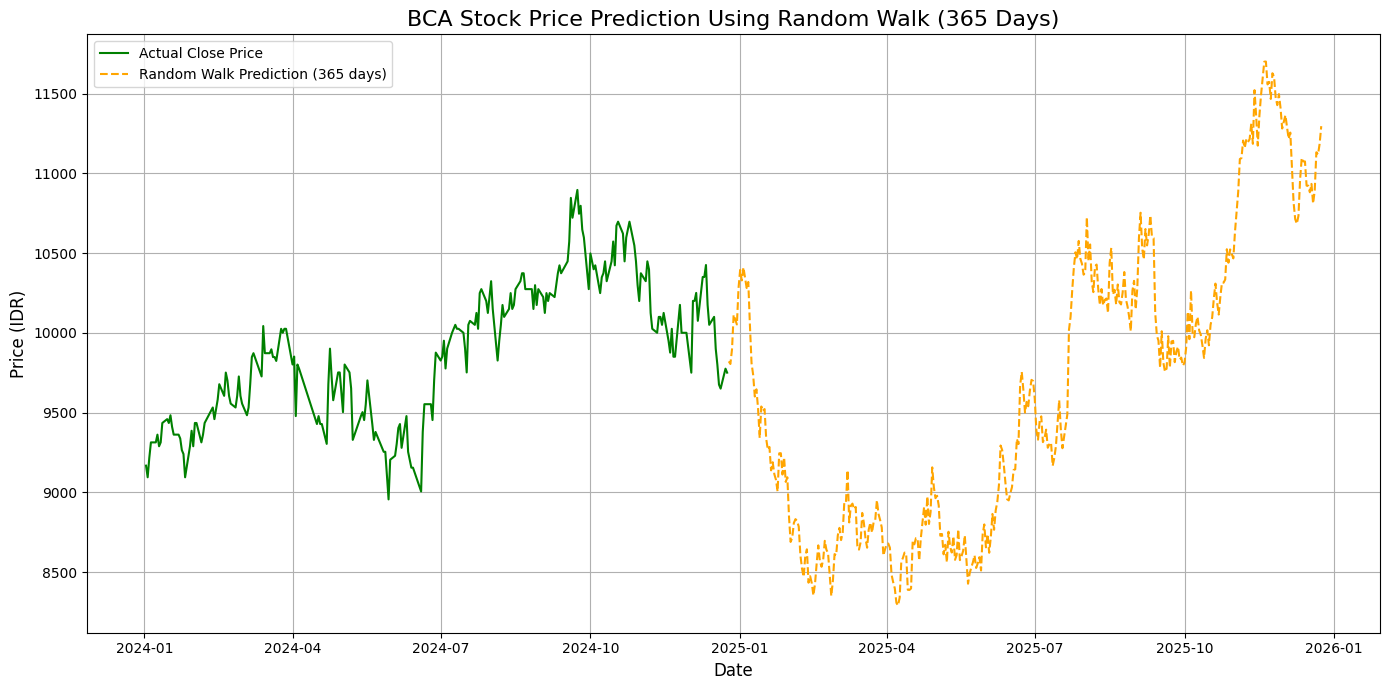

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(bca.index, bca['Close'], label="Actual Close Price", color="green")
plt.plot(future_bca['Date'], future_bca['Predicted Close'], label=f"Random Walk Prediction ({days} days)", linestyle="--", color="orange")
plt.title(f"BCA Stock Price Prediction Using Random Walk ({days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Pertamina

In [41]:
print(pertamina)

Price             Close         High          Low         Open     Volume
Ticker          PGEO.JK      PGEO.JK      PGEO.JK      PGEO.JK    PGEO.JK
Date                                                                     
2024-01-02  1214.215454  1214.215454  1123.029313  1123.029313   95095400
2024-01-03  1228.613159  1247.810240  1204.616808  1214.215349   93216000
2024-01-04  1233.412476  1257.408827  1219.014665  1233.412476   56403100
2024-01-05  1228.613159  1247.810240  1223.813889  1243.010970   52058100
2024-01-08  1180.620483  1257.408808  1166.222673  1228.613186  114174100
...                 ...          ...          ...          ...        ...
2024-12-18   900.000000   920.000000   900.000000   900.000000   12611900
2024-12-19   965.000000   970.000000   880.000000   900.000000   25841500
2024-12-20   975.000000   995.000000   945.000000   965.000000   16903100
2024-12-23   960.000000   980.000000   960.000000   975.000000    4424200
2024-12-24   955.000000   980.000000  

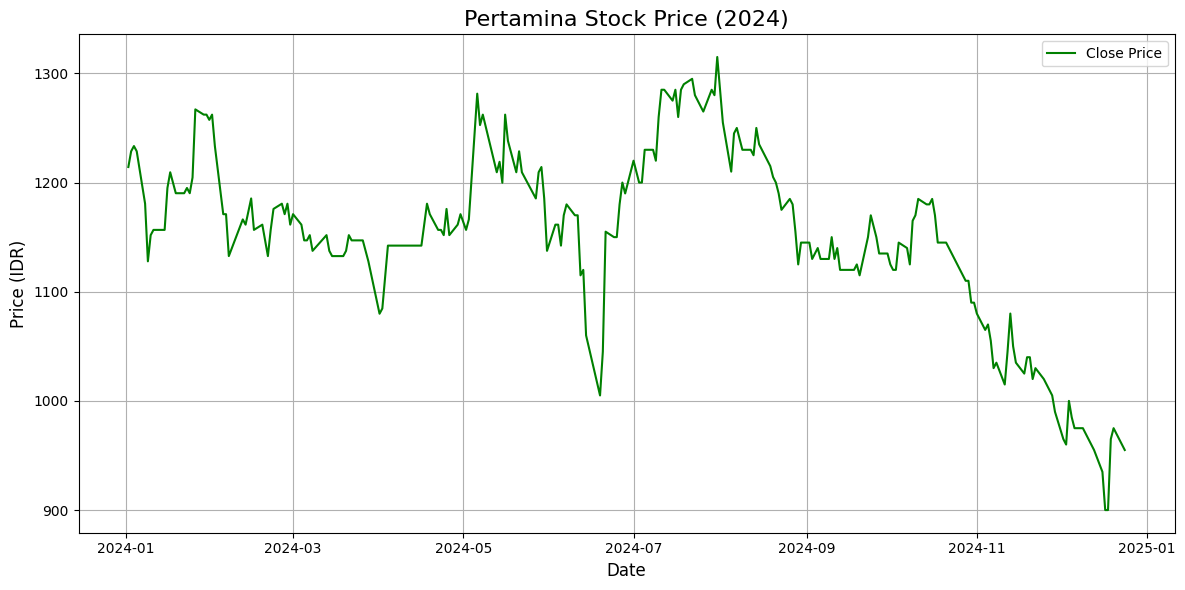

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(pertamina.index, pertamina["Close"], label="Close Price", linestyle="-", color="green")
plt.title("Pertamina Stock Price (2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [43]:
print(pertamina.describe())

Price         Close         High          Low         Open        Volume
Ticker      PGEO.JK      PGEO.JK      PGEO.JK      PGEO.JK       PGEO.JK
count    235.000000   235.000000   235.000000   235.000000  2.350000e+02
mean    1151.165969  1172.087076  1138.027361  1155.148731  2.205813e+07
std       83.453346    87.107138    81.935221    83.198003  2.280601e+07
min      900.000000   920.000000   880.000000   900.000000  0.000000e+00
25%     1125.000000  1140.000000  1120.000000  1130.000000  9.131950e+06
50%     1156.624146  1175.000000  1145.000000  1161.423386  1.411590e+07
75%     1202.308411  1224.406982  1190.219010  1209.416091  2.489095e+07
max     1315.000000  1439.781050  1280.000000  1325.000000  1.494506e+08


### Random Walk

In [44]:
pertamina['Log Return Pertamina'] = np.log(pertamina['Close'] / pertamina['Close'].shift(1))
log_return_mean_pertamina = pertamina['Log Return Pertamina'].mean()
log_return_std_pertamina = pertamina['Log Return Pertamina'].std()

In [48]:
np.random.seed(42)  
days = 365
random_steps2 = np.random.normal(loc=log_return_mean_pertamina, scale=log_return_std_pertamina, size=days)

last_price_pertamina = pertamina['Close'].iloc[-1]  
future_prices_pertamina = [last_price_pertamina * np.exp(random_steps2[0])]
for step in random_steps2[1:]:
    future_prices_pertamina.append(future_prices_pertamina[-1] * np.exp(step))

In [49]:
future_dates_pertamina = pd.date_range(start=pertamina.index[-1] + pd.Timedelta(days=1), periods=days)
future_pertamina = pd.DataFrame({'Date': future_dates_pertamina, 'Predicted Close': future_prices_pertamina})

print(future_pertamina)

          Date                                    Predicted Close
0   2024-12-25  Ticker
PGEO.JK    963.690553
Name: 2024-12-24 ...
1   2024-12-26  Ticker
PGEO.JK    960.00329
Name: 2024-12-24 0...
2   2024-12-27  Ticker
PGEO.JK    971.713446
Name: 2024-12-24 ...
3   2024-12-28  Ticker
PGEO.JK    1001.203328
Name: 2024-12-24...
4   2024-12-29  Ticker
PGEO.JK    995.432633
Name: 2024-12-24 ...
..         ...                                                ...
360 2025-12-20  Ticker
PGEO.JK    674.428929
Name: 2024-12-24 ...
361 2025-12-21  Ticker
PGEO.JK    695.03372
Name: 2024-12-24 0...
362 2025-12-22  Ticker
PGEO.JK    692.789276
Name: 2024-12-24 ...
363 2025-12-23  Ticker
PGEO.JK    697.746513
Name: 2024-12-24 ...
364 2025-12-24  Ticker
PGEO.JK    706.86671
Name: 2024-12-24 0...

[365 rows x 2 columns]


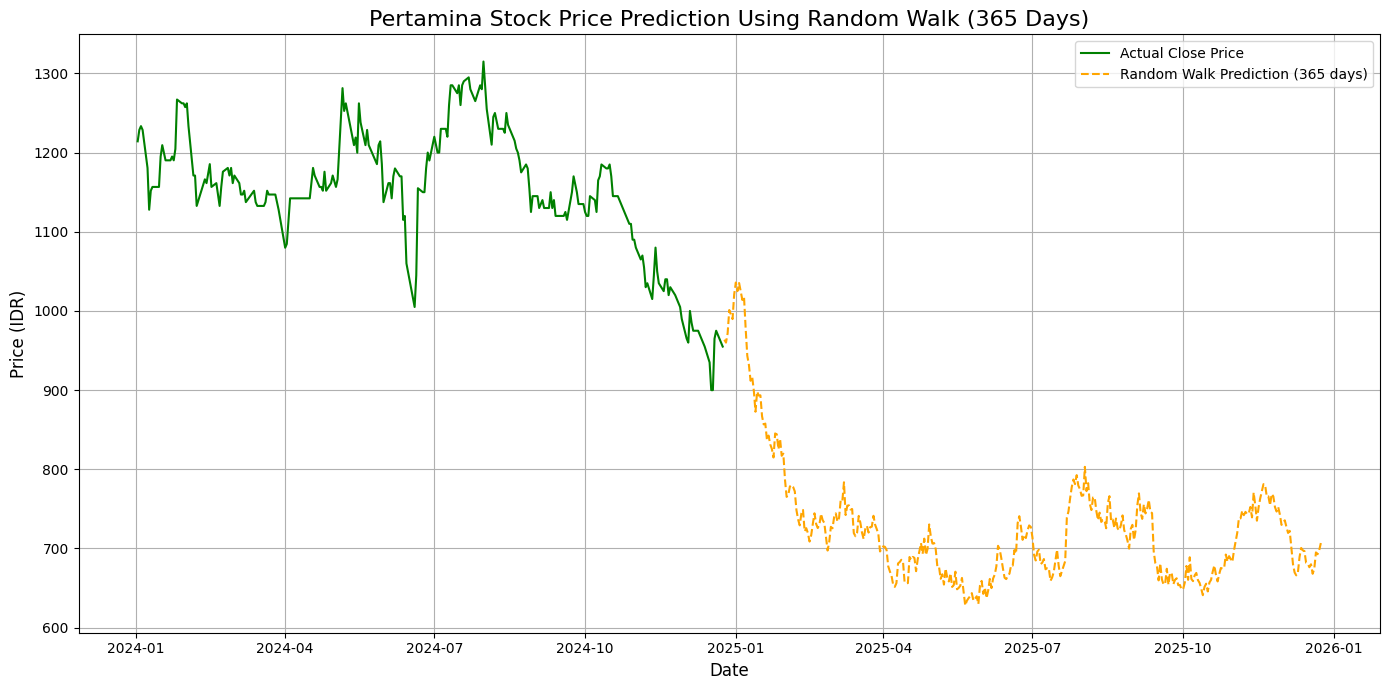

In [51]:
plt.figure(figsize=(14, 7))
plt.plot(pertamina.index, pertamina['Close'], label="Actual Close Price", color="green")
plt.plot(future_pertamina['Date'], future_pertamina['Predicted Close'], label=f"Random Walk Prediction ({days} days)", linestyle="--", color="orange")
plt.title(f"Pertamina Stock Price Prediction Using Random Walk ({days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Geometric Brownian Motion

In [75]:
data = pertamina['Close']
returns = np.log(data / data.shift(1)) 

mu = returns.mean()
sigma = returns.std()

days = 365
S0 = data.iloc[-1]
np.random.seed(42) 
epsilon = np.random.normal(0, 1, days)

dt = 1  
prices = [S0]

In [76]:
for i in range(1, days + 1):
    S_t = prices[-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * epsilon[i - 1] * np.sqrt(dt))
    prices.append(S_t)

dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(prices[1:]), freq='B')
future_pertamina = pd.DataFrame({'Date': dates, 'Predicted Close': prices[1:]})

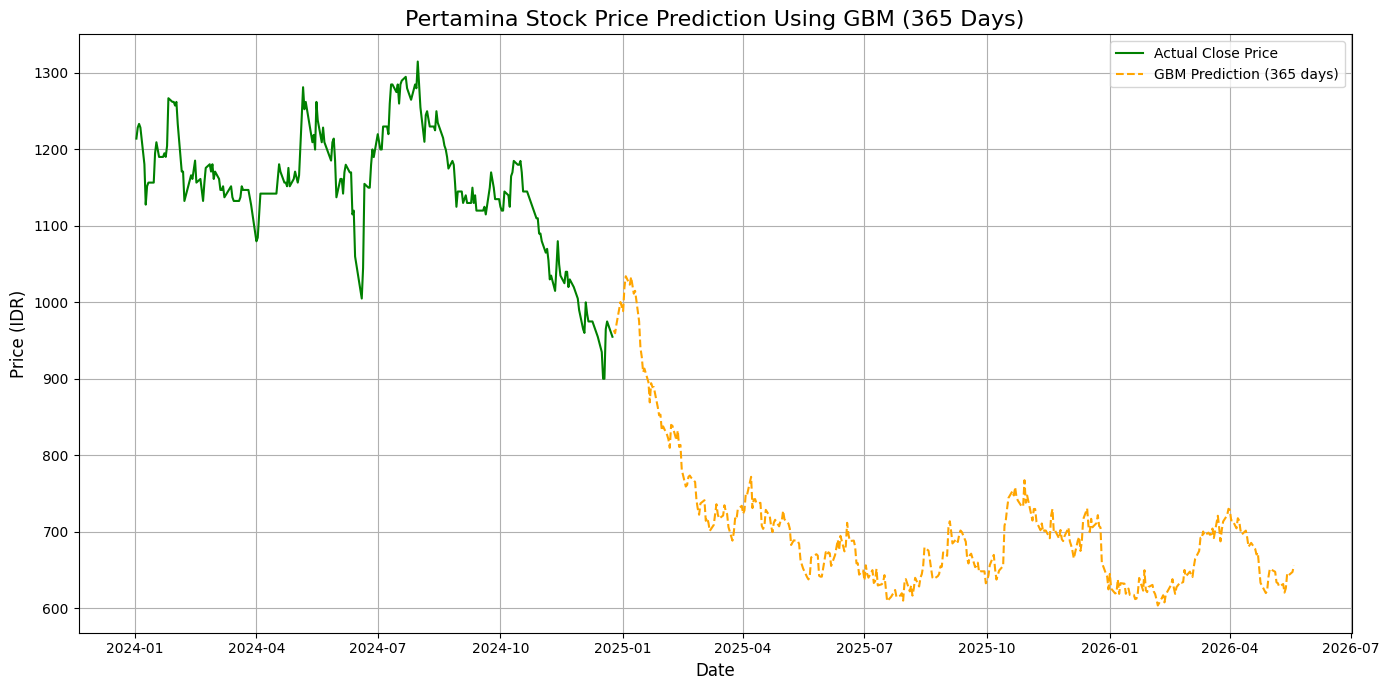

In [77]:
plt.figure(figsize=(14, 7))
plt.plot(pertamina.index, pertamina['Close'], label="Actual Close Price", color="green")
plt.plot(future_pertamina['Date'], future_pertamina['Predicted Close'], label=f"GBM Prediction ({days} days)", linestyle="--", color="orange")
plt.title(f"Pertamina Stock Price Prediction Using GBM ({days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Barito

In [52]:
print(barito)

Price             Close         High          Low         Open     Volume
Ticker          BRPT.JK      BRPT.JK      BRPT.JK      BRPT.JK    BRPT.JK
Date                                                                     
2024-01-02  1381.528076  1431.402650  1326.665862  1331.653380  213322971
2024-01-03  1351.603271  1391.503054  1336.640838  1381.528139   95469607
2024-01-04  1366.565674  1386.515504  1346.615844  1356.590759   72526957
2024-01-05  1346.615845  1376.540590  1331.653411  1371.553071   73800492
2024-01-08  1316.691040  1371.553136  1306.716125  1351.603305   90600629
...                 ...          ...          ...          ...        ...
2024-12-18   875.000000   905.000000   875.000000   890.000000   66752300
2024-12-19   830.000000   865.000000   830.000000   865.000000   90028300
2024-12-20   820.000000   850.000000   815.000000   835.000000   78113200
2024-12-23   870.000000   890.000000   830.000000   830.000000  127199600
2024-12-24   895.000000   920.000000  

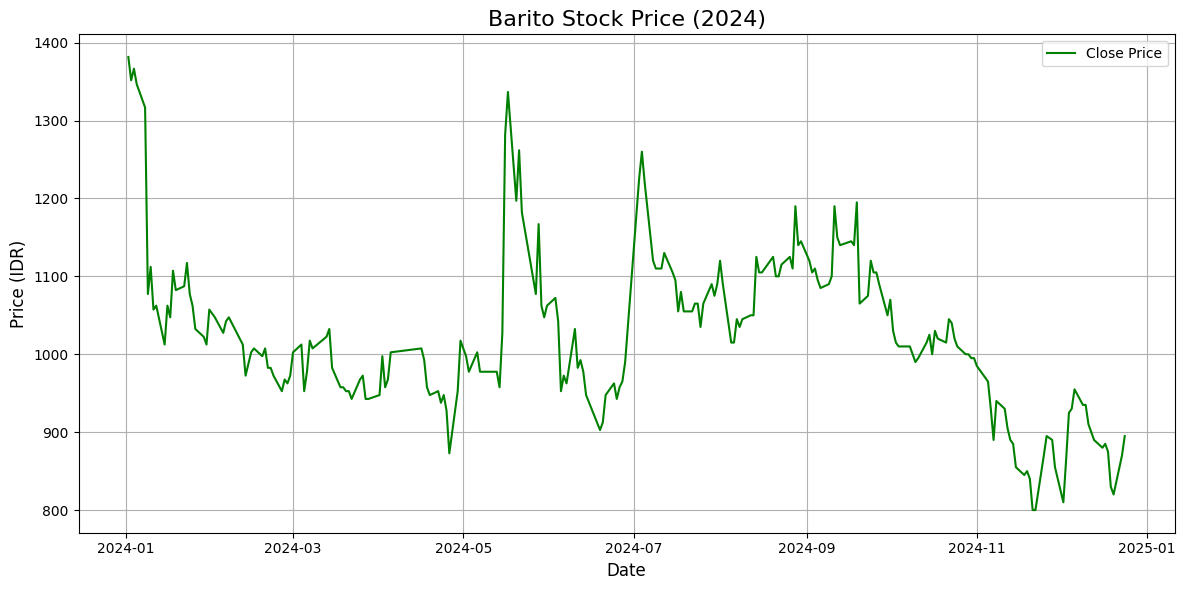

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(barito.index, barito["Close"], label="Close Price", linestyle="-", color="green")
plt.title("Barito Stock Price (2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [54]:
print(barito.describe())

Price         Close         High          Low         Open        Volume
Ticker      BRPT.JK      BRPT.JK      BRPT.JK      BRPT.JK       BRPT.JK
count    235.000000   235.000000   235.000000   235.000000  2.350000e+02
mean    1025.685551  1056.176771  1006.922852  1031.165739  1.484832e+08
std      103.178449   111.574476    97.434176   104.089414  1.337079e+08
min      800.000000   820.000000   785.000000   800.000000  3.219340e+07
25%      957.593445   982.530762   952.605972   962.580976  7.235743e+07
50%     1015.000000  1040.000000  1002.480682  1020.000000  1.046704e+08
75%     1088.633789  1120.000000  1062.330260  1088.633808  1.700339e+08
max     1381.528076  1456.340099  1346.615844  1381.528139  1.138466e+09


### Random Walk

In [55]:
barito['Log Return Barito'] = np.log(barito['Close'] / barito['Close'].shift(1))
log_return_mean_barito = barito['Log Return Barito'].mean()
log_return_std_barito = barito['Log Return Barito'].std()

In [56]:
np.random.seed(42)  
days = 364
random_steps3 = np.random.normal(loc=log_return_mean_barito, scale=log_return_std_barito, size=days)

last_price_barito = barito['Close'].iloc[-1]  
future_prices_barito = [last_price_barito * np.exp(random_steps3[0])]
for step in random_steps3[1:]:
    future_prices_barito.append(future_prices_barito[-1] * np.exp(step))

In [57]:
future_dates_barito = pd.date_range(start=barito.index[-1] + pd.Timedelta(days=1), periods=days)
future_barito = pd.DataFrame({'Date': future_dates_barito, 'Predicted Close': future_prices_barito})

print(future_barito)

          Date                                    Predicted Close
0   2024-12-25  Ticker
BRPT.JK    910.90988
Name: 2024-12-24 0...
1   2024-12-26  Ticker
BRPT.JK    904.305817
Name: 2024-12-24 ...
2   2024-12-27  Ticker
BRPT.JK    925.84547
Name: 2024-12-24 0...
3   2024-12-28  Ticker
BRPT.JK    980.995627
Name: 2024-12-24 ...
4   2024-12-29  Ticker
BRPT.JK    970.228832
Name: 2024-12-24 ...
..         ...                                                ...
359 2025-12-19  Ticker
BRPT.JK    469.788812
Name: 2024-12-24 ...
360 2025-12-20  Ticker
BRPT.JK    478.564448
Name: 2024-12-24 ...
361 2025-12-21  Ticker
BRPT.JK    507.26433
Name: 2024-12-24 0...
362 2025-12-22  Ticker
BRPT.JK    504.169577
Name: 2024-12-24 ...
363 2025-12-23  Ticker
BRPT.JK    511.224082
Name: 2024-12-24 ...

[364 rows x 2 columns]


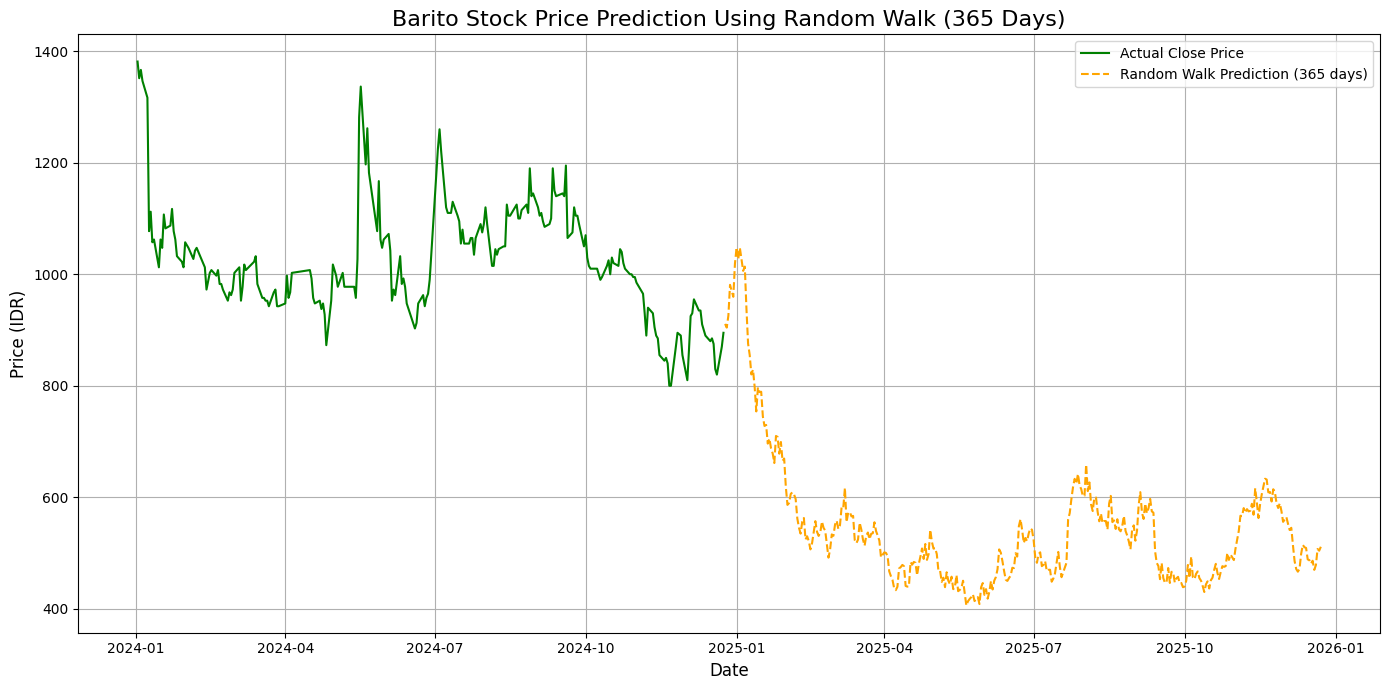

In [73]:
plt.figure(figsize=(14, 7))
plt.plot(barito.index, barito['Close'], label="Actual Close Price", color="green")
plt.plot(future_barito['Date'], future_barito['Predicted Close'], label=f"Random Walk Prediction ({days} days)", linestyle="--", color="orange")
plt.title(f"Barito Stock Price Prediction Using Random Walk ({days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Geometric Brownian Motion

In [78]:
data = barito['Close']
returns = np.log(data / data.shift(1)) 

mu = returns.mean()
sigma = returns.std()

days = 365
S0 = data.iloc[-1]
np.random.seed(42) 
epsilon = np.random.normal(0, 1, days)

dt = 1  
prices = [S0]

In [79]:
for i in range(1, days + 1):
    S_t = prices[-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * epsilon[i - 1] * np.sqrt(dt))
    prices.append(S_t)

dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(prices[1:]), freq='B')
future_barito = pd.DataFrame({'Date': dates, 'Predicted Close': prices[1:]})

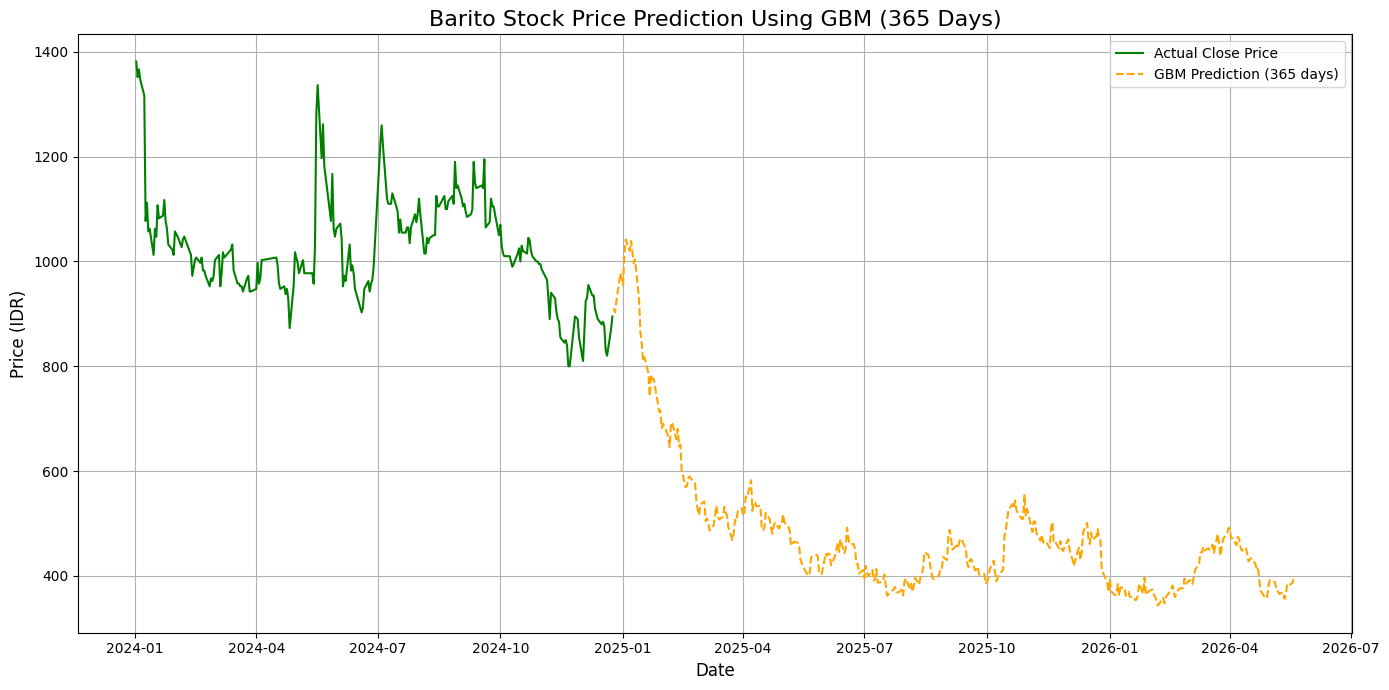

In [84]:
plt.figure(figsize=(14, 7))
plt.plot(barito.index, barito['Close'], label="Actual Close Price", color="green")
plt.plot(future_barito['Date'], future_barito['Predicted Close'], label=f"GBM Prediction ({days} days)", linestyle="--", color="orange")
plt.title(f"Barito Stock Price Prediction Using GBM ({days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Agung Podomoro Land

In [60]:
print(podomoro)

Price        Close    High     Low    Open    Volume
Ticker     APLN.JK APLN.JK APLN.JK APLN.JK   APLN.JK
Date                                                
2024-01-02   128.0   130.0   127.0   129.0   4283000
2024-01-03   129.0   131.0   128.0   129.0   6691200
2024-01-04   130.0   131.0   129.0   129.0   6178700
2024-01-05   130.0   133.0   130.0   130.0  14294400
2024-01-08   133.0   137.0   131.0   131.0  34132400
...            ...     ...     ...     ...       ...
2024-12-18    99.0   101.0    98.0   100.0   7352800
2024-12-19    92.0    99.0    92.0    99.0  15910500
2024-12-20    94.0    94.0    92.0    92.0   7439100
2024-12-23    94.0    96.0    92.0    94.0  13424900
2024-12-24    92.0    95.0    90.0    95.0  17154200

[235 rows x 5 columns]


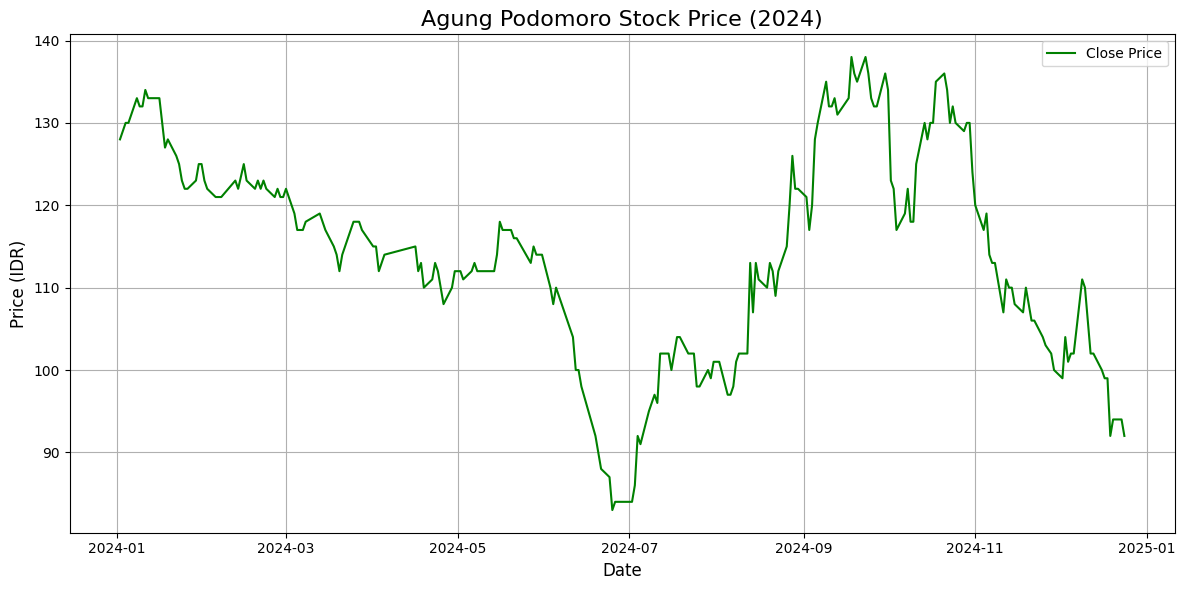

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(podomoro.index, podomoro["Close"], label="Close Price", linestyle="-", color="green")
plt.title("Agung Podomoro Stock Price (2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [62]:
print(podomoro.describe())

Price        Close        High         Low        Open        Volume
Ticker     APLN.JK     APLN.JK     APLN.JK     APLN.JK       APLN.JK
count   235.000000  235.000000  235.000000  235.000000  2.350000e+02
mean    114.080851  116.570213  112.136170  114.297872  2.190563e+07
std      12.891305   12.971631   12.891666   13.048750  3.345429e+07
min      83.000000   85.000000   78.000000   78.000000  1.304600e+06
25%     104.000000  107.000000  102.000000  105.000000  5.736400e+06
50%     114.000000  116.000000  112.000000  114.000000  1.192240e+07
75%     123.000000  125.500000  121.000000  123.000000  2.222580e+07
max     138.000000  143.000000  136.000000  139.000000  2.454515e+08


### Random Walk

In [63]:
podomoro['Log Return Podomoro'] = np.log(podomoro['Close'] / podomoro['Close'].shift(1))
log_return_mean_podomoro = podomoro['Log Return Podomoro'].mean()
log_return_std_podomoro = podomoro['Log Return Podomoro'].std()

In [68]:
np.random.seed(42)  
days = 365
random_steps4 = np.random.normal(loc=log_return_mean_podomoro, scale=log_return_std_podomoro, size=days)

last_price_podomoro = podomoro['Close'].iloc[-1]  
future_prices_podomoro = [last_price_podomoro * np.exp(random_steps4[0])]
for step in random_steps4[1:]:
    future_prices_podomoro.append(future_prices_podomoro[-1] * np.exp(step))

In [69]:
future_dates_podomoro = pd.date_range(start=podomoro.index[-1] + pd.Timedelta(days=1), periods=days)
future_podomoro = pd.DataFrame({'Date': future_dates_podomoro, 'Predicted Close': future_prices_podomoro})

print(future_podomoro)

          Date                                    Predicted Close
0   2024-12-25  Ticker
APLN.JK    92.98282
Name: 2024-12-24 00...
1   2024-12-26  Ticker
APLN.JK    92.541087
Name: 2024-12-24 0...
2   2024-12-27  Ticker
APLN.JK    93.872515
Name: 2024-12-24 0...
3   2024-12-28  Ticker
APLN.JK    97.26466
Name: 2024-12-24 00...
4   2024-12-29  Ticker
APLN.JK    96.577898
Name: 2024-12-24 0...
..         ...                                                ...
360 2025-12-20  Ticker
APLN.JK    56.787976
Name: 2024-12-24 0...
361 2025-12-21  Ticker
APLN.JK    58.853893
Name: 2024-12-24 0...
362 2025-12-22  Ticker
APLN.JK    58.616193
Name: 2024-12-24 0...
363 2025-12-23  Ticker
APLN.JK    59.106142
Name: 2024-12-24 0...
364 2025-12-24  Ticker
APLN.JK    60.018246
Name: 2024-12-24 0...

[365 rows x 2 columns]


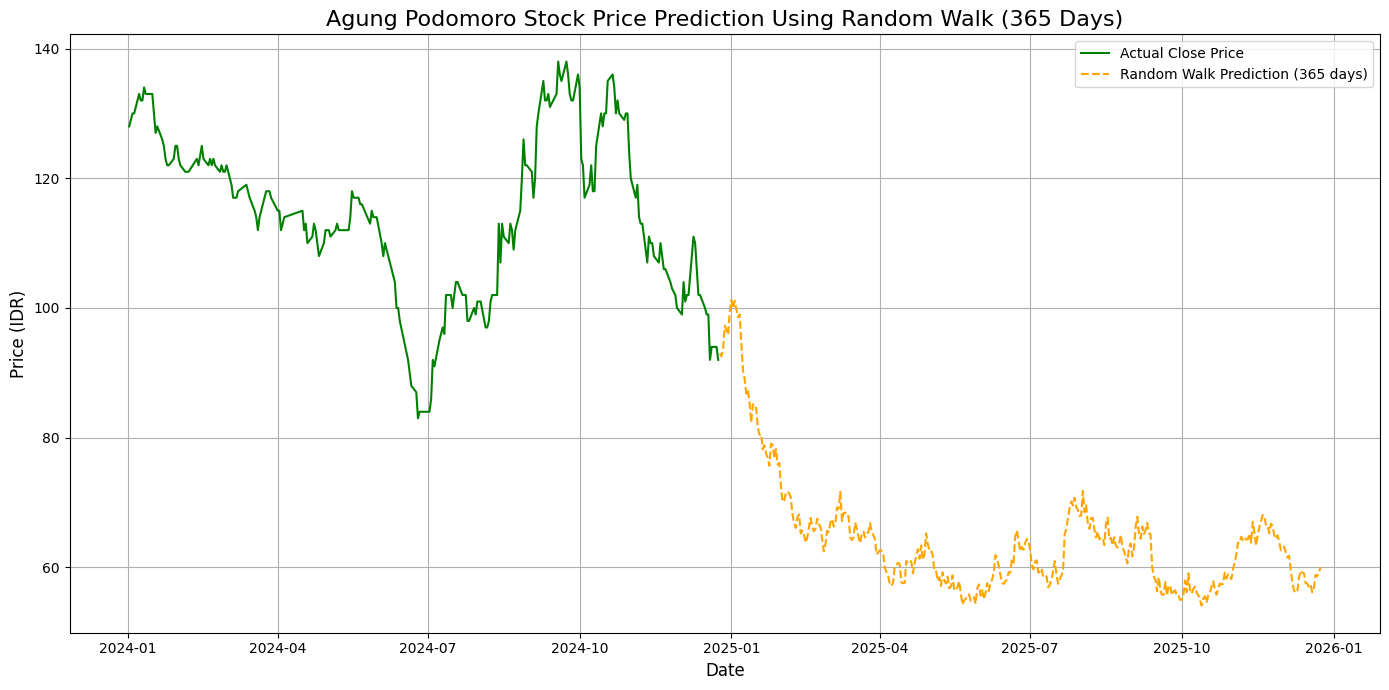

In [70]:
plt.figure(figsize=(14, 7))
plt.plot(podomoro.index, podomoro['Close'], label="Actual Close Price", color="green")
plt.plot(future_podomoro['Date'], future_podomoro['Predicted Close'], label=f"Random Walk Prediction ({days} days)", linestyle="--", color="orange")
plt.title(f"Agung Podomoro Stock Price Prediction Using Random Walk ({days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Geometric Brownian Motion

In [81]:
data = podomoro['Close']
returns = np.log(data / data.shift(1)) 

mu = returns.mean()
sigma = returns.std()

days = 365
S0 = data.iloc[-1]
np.random.seed(42) 
epsilon = np.random.normal(0, 1, days)

dt = 1  
prices = [S0]

In [82]:
for i in range(1, days + 1):
    S_t = prices[-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * epsilon[i - 1] * np.sqrt(dt))
    prices.append(S_t)

dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(prices[1:]), freq='B')
future_podomoro = pd.DataFrame({'Date': dates, 'Predicted Close': prices[1:]})

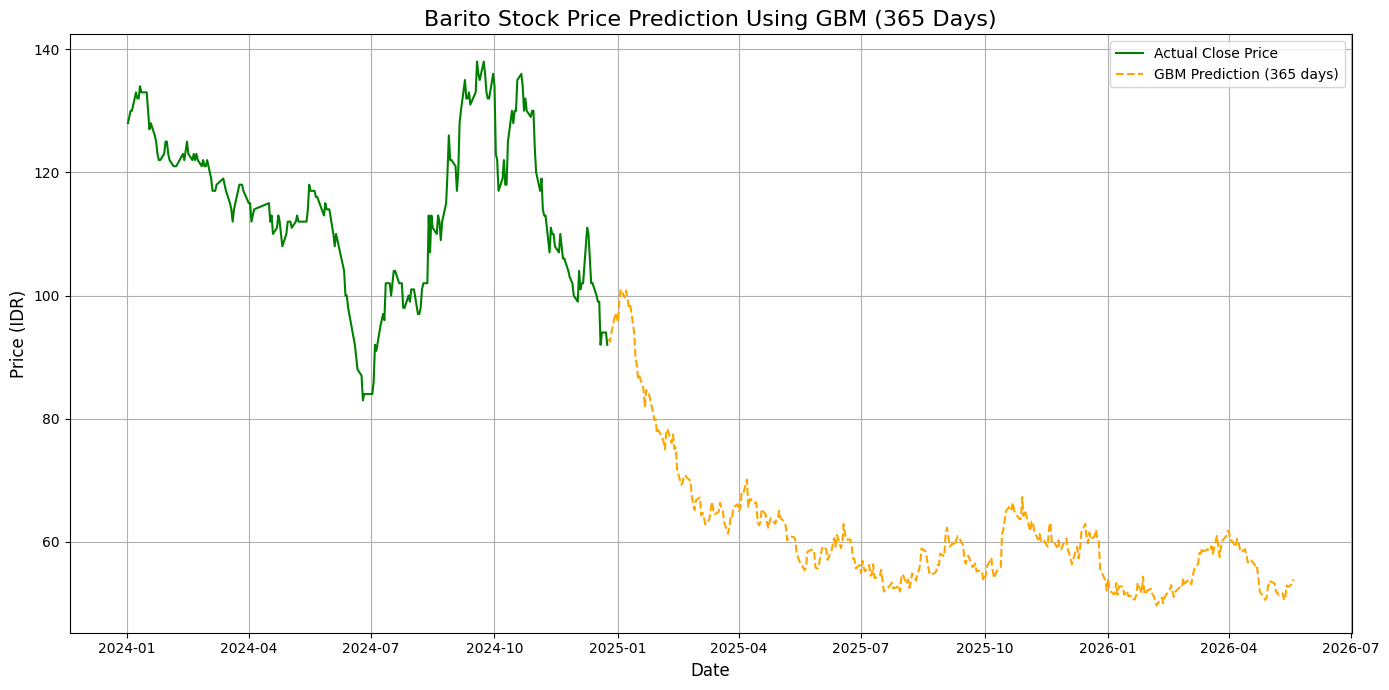

In [85]:
plt.figure(figsize=(14, 7))
plt.plot(podomoro.index, podomoro['Close'], label="Actual Close Price", color="green")
plt.plot(future_podomoro['Date'], future_podomoro['Predicted Close'], label=f"GBM Prediction ({days} days)", linestyle="--", color="orange")
plt.title(f"Barito Stock Price Prediction Using GBM ({days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (IDR)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()